## Visualizing and Predicting Online Retail Sales

Goal of this project is to investigate and analyze sales trends, customer behavior, and performance of products using the Online Retail II dataset. We will make a **regression analysis** to predict *sales revenue* based on key factors like product type, customer segment, and time. 

The dataset we are going to use in this project originates from the UCI Machine Learning Repository and has data from online retail company. We will use concatenated form of a unified dataset for 2009-2010 and 2010-2011 time periods. 

In [3]:
import pandas as pd 

df_2009 = pd.read_excel('online_retail_II 2.xlsx', sheet_name='Year 2009-2010')
df_2010 = pd.read_excel('online_retail_II 2.xlsx', sheet_name='Year 2010-2011')

retail = pd.concat([df_2009, df_2010], ignore_index=True)

In [4]:
print(retail.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [5]:
print(retail.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB
None


In [6]:
print(retail.describe())

           Quantity                    InvoiceDate         Price  \
count  1.067371e+06                        1067371  1.067371e+06   
mean   9.938898e+00  2011-01-02 21:13:55.394028544  4.649388e+00   
min   -8.099500e+04            2009-12-01 07:45:00 -5.359436e+04   
25%    1.000000e+00            2010-07-09 09:46:00  1.250000e+00   
50%    3.000000e+00            2010-12-07 15:28:00  2.100000e+00   
75%    1.000000e+01            2011-07-22 10:23:00  4.150000e+00   
max    8.099500e+04            2011-12-09 12:50:00  3.897000e+04   
std    1.727058e+02                            NaN  1.235531e+02   

         Customer ID  
count  824364.000000  
mean    15324.638504  
min     12346.000000  
25%     13975.000000  
50%     15255.000000  
75%     16797.000000  
max     18287.000000  
std      1697.464450  


According to the first impression, we can say that the combined dataset has **1,067,371 rows** and **8 columns**, which have 8 essential variables of the sales transaction:

* **Invoice**: Unique identifier of each transaction
* **StockCode**: Product identifier
* **Description**: Textual description of the product
* **Quantity**: Number of units purchased (can be negative for returns)
* **InvoiceDate**: Timestamp of the transaction
* **Price**: Unit price of the item
* **Customer ID**: Identifier of the customer (nullable)
* **Country**: Country of the customer

When we look at info() output we can see that most of the columns are complete except for the Customer ID column which contains almost **23% missing values**. During the cleaning stage of the data, this should be considered. InvoiceDate column is already in datetime format, which allows us to do time-based analysis. 

Another thing we should be careful when we look at describe() output, is **Quantity** and **Price** columns contain **negative values**, seems like data errors or may represent the return orders. These will be handled during data cleaning. 

### Data Cleaning 

In this part, I will analyze the missing values, clean the negative values. Also, I will make **new column** called **TotalPrice** from **Quantity** and **Price** columns to keep track the total value of the sales. 
Another thing I will add is date features which will help me to analyze the dataset according to year and month.
Finally, I will clean the Description column if it is needed. 

In [10]:
missing_values = retail.isnull().sum()
print(missing_values[missing_values > 0])

Description      4382
Customer ID    243007
dtype: int64


So, now we can see that columns **Description** and **Customer ID** have missing values. Because **Customer ID** column is really crucial variable for any customer type analysis, I will **drop all the missing rows** in Customer ID column. Although it will reduce the dataset size, it will ensure that our analysis remains meaningful. On the other hand, since the **Description** column has only few missing data, so I will drop those rows as well.

In [12]:
retail = retail.dropna(subset=['Customer ID', 'Description'])

In [13]:
retail = retail[(retail['Quantity'] > 0) & (retail['Price'] > 0)]
# It's gonna keep only the positive quantity and price 

In [14]:
retail['Total Price'] = retail['Quantity'] * retail['Price']

In [15]:
print(retail[['Quantity', 'Price', 'Total Price']].head())

   Quantity  Price  Total Price
0        12   6.95         83.4
1        12   6.75         81.0
2        12   6.75         81.0
3        48   2.10        100.8
4        24   1.25         30.0


After cleaning missing values and negative values, I created a nwe column as TotalPrice to keep track of the total revenue performance. 

### Feature Engineering: Date-Based Fields

To make a time-based analysis in Tableau, I used InvoiceDate column to create several data-related columns. These fields will be helpful to analyze trends over year, month, and daily basis. So we can follow revenue and customer behavior over time and can keep track for the seasonality. 

In [ ]:
# For year information
retail['Year'] = retail['InvoiceDate'].dt.year

# For month information
retail['Month'] = retail['InvoiceDate'].dt.month

# Year-Month type of new column such as 2012-09
retail['YearMonth'] = retail['InvoiceDate'].dt.to_period('M')

# For daily base analysis 
retail['Day'] = retail['InvoiceDate'].dt.day

# For the weekday type of analysis 
retail['Weekday'] = retail['InvoiceDate'].dt.weekday

In [19]:
print(retail[['InvoiceDate', 'Year', 'Month', 'YearMonth']].head())

          InvoiceDate  Year  Month YearMonth
0 2009-12-01 07:45:00  2009     12   2009-12
1 2009-12-01 07:45:00  2009     12   2009-12
2 2009-12-01 07:45:00  2009     12   2009-12
3 2009-12-01 07:45:00  2009     12   2009-12
4 2009-12-01 07:45:00  2009     12   2009-12


### Exporting Cleaned and Prepared Dataset

In [21]:
retail.to_csv('cleaned_online_retail.csv', index=False)

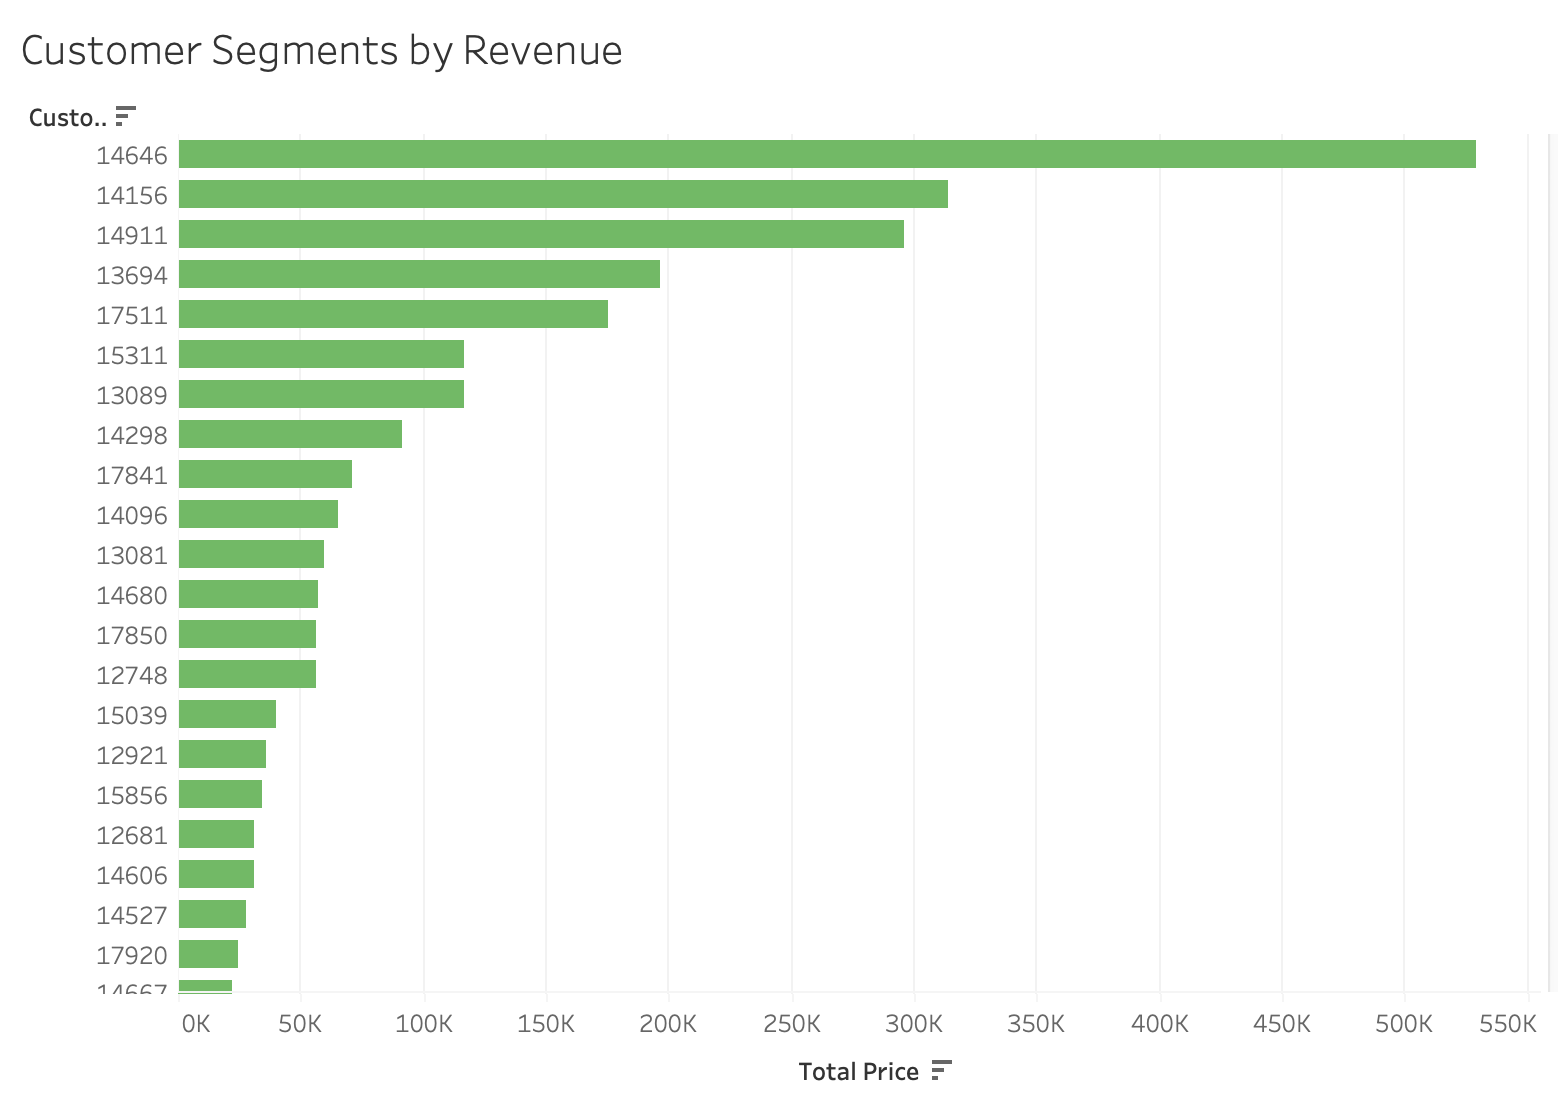

In [56]:
from IPython.display import Image

Image(
    filename='/Users/meryemcamci/Documents/GitHub/retail-sales-project/tableau_screenshots/customer-segments-by-revenue.png',
    width=800  
)

### Customer Segments by Revenue

This bar chart displays that a small group of customers contributes a proportionally high amount to the total revenue. Especially, customer IDs 14646 and 14156 generate crucially more revenue than others.

This shows that customer loyalty and retention programs could be highly effective when targeted toward these high-value clients. On the other hand, a long tail of smaller contributors still represents an opportunity for growth through targeted promotions or with bundle offers.

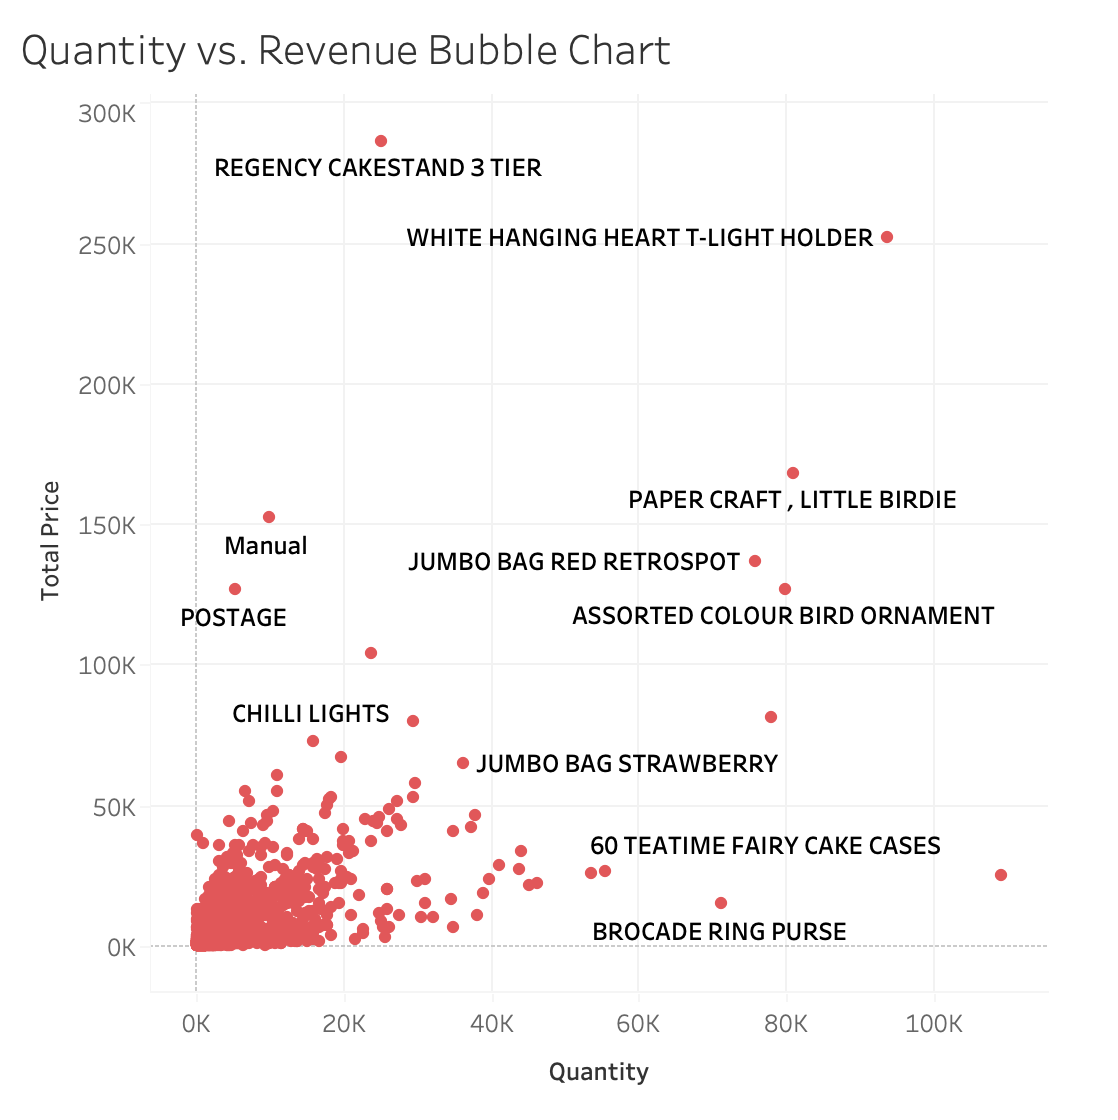

In [59]:
from IPython.display import Image

Image(
    filename='/Users/meryemcamci/Documents/GitHub/retail-sales-project/tableau_screenshots/quantity-vs-revenue-bubble-chart.png',
    width=800  
)

### Quantity vs Revenue Bubble Chart 

This chart shows the relationship between the quantity sold and the total revenue for each product. We can see that some products, such as REGENCY CAKESTAND 3 TIER and WHITE HANGING HEART T-LIGHT HOLDER, generate high revenue even though they may not be sold in the highest quantities.

Based on this chart, we can identify high-value or low-value products and develop more effective marketing strategies accordingly.

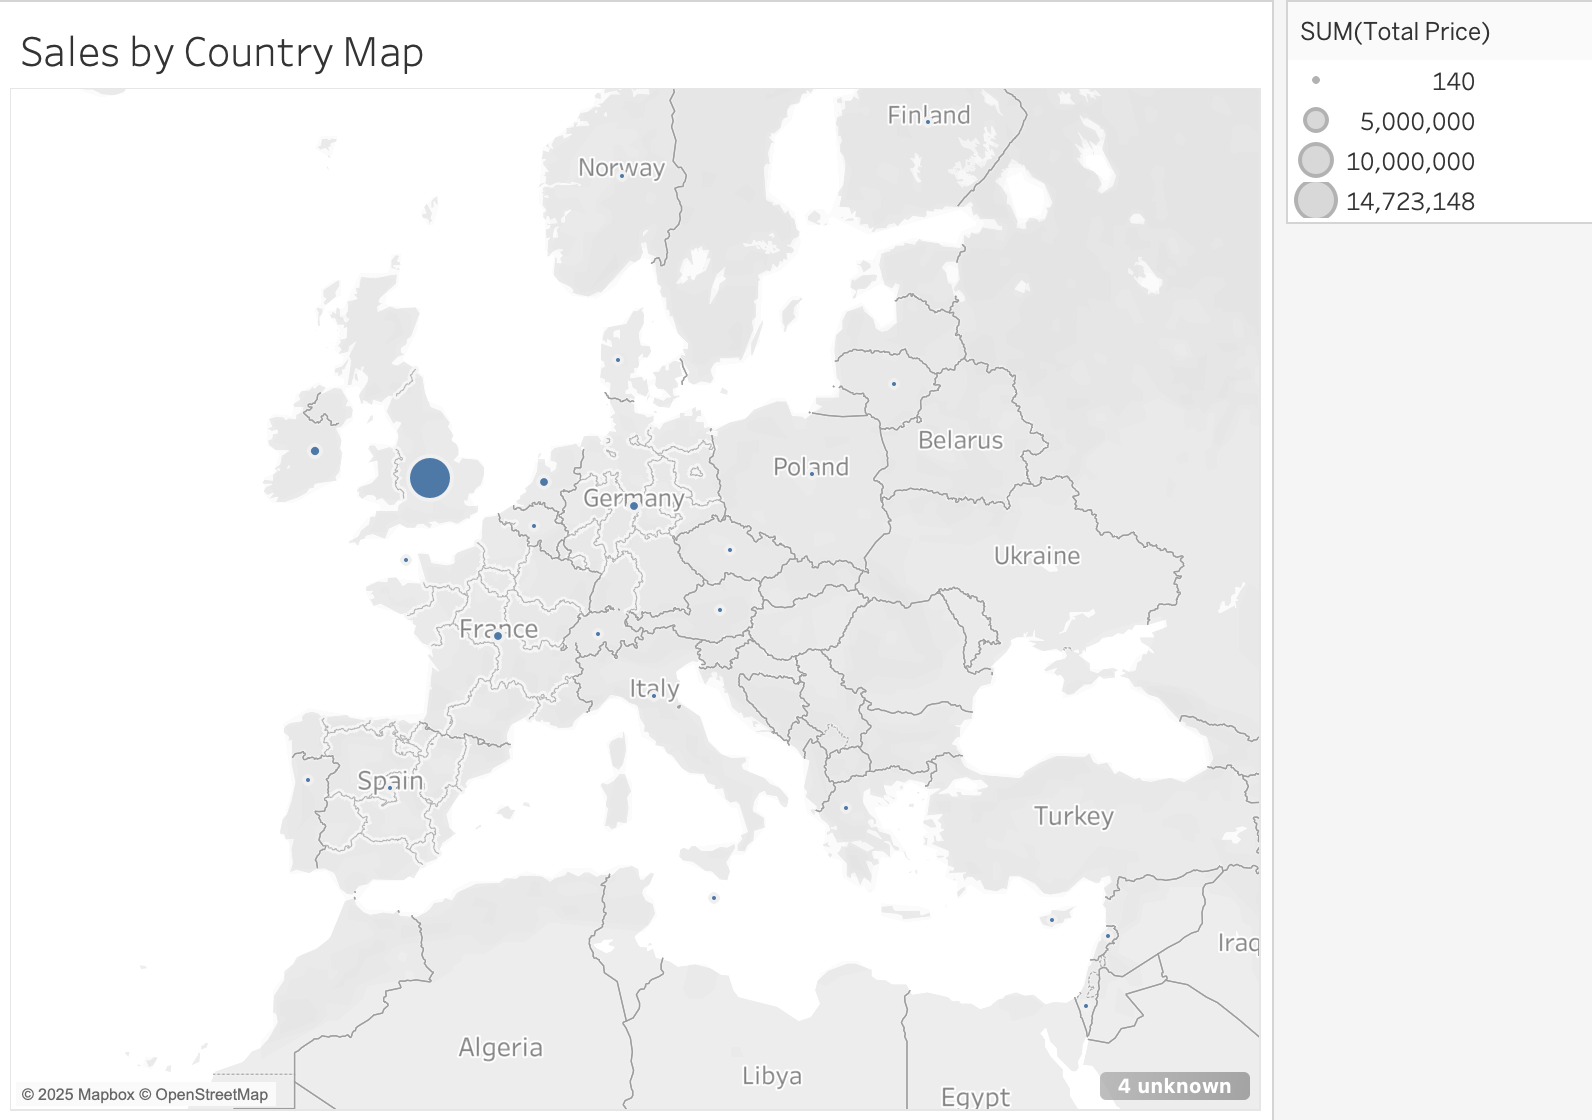

In [61]:
from IPython.display import Image

Image(
    filename='/Users/meryemcamci/Documents/GitHub/retail-sales-project/tableau_screenshots/sales-by-country-map.png',
    width=800  
)

### Sales by Country Map 

This geographical map chart displays the total revenue by country.
According to the map, we can say that sales has a strong domestic base since the largest circle is over the United Kingdom. 
There are smaller bubbles in other countries which shows the international presence. However, it shows significantly less impact.

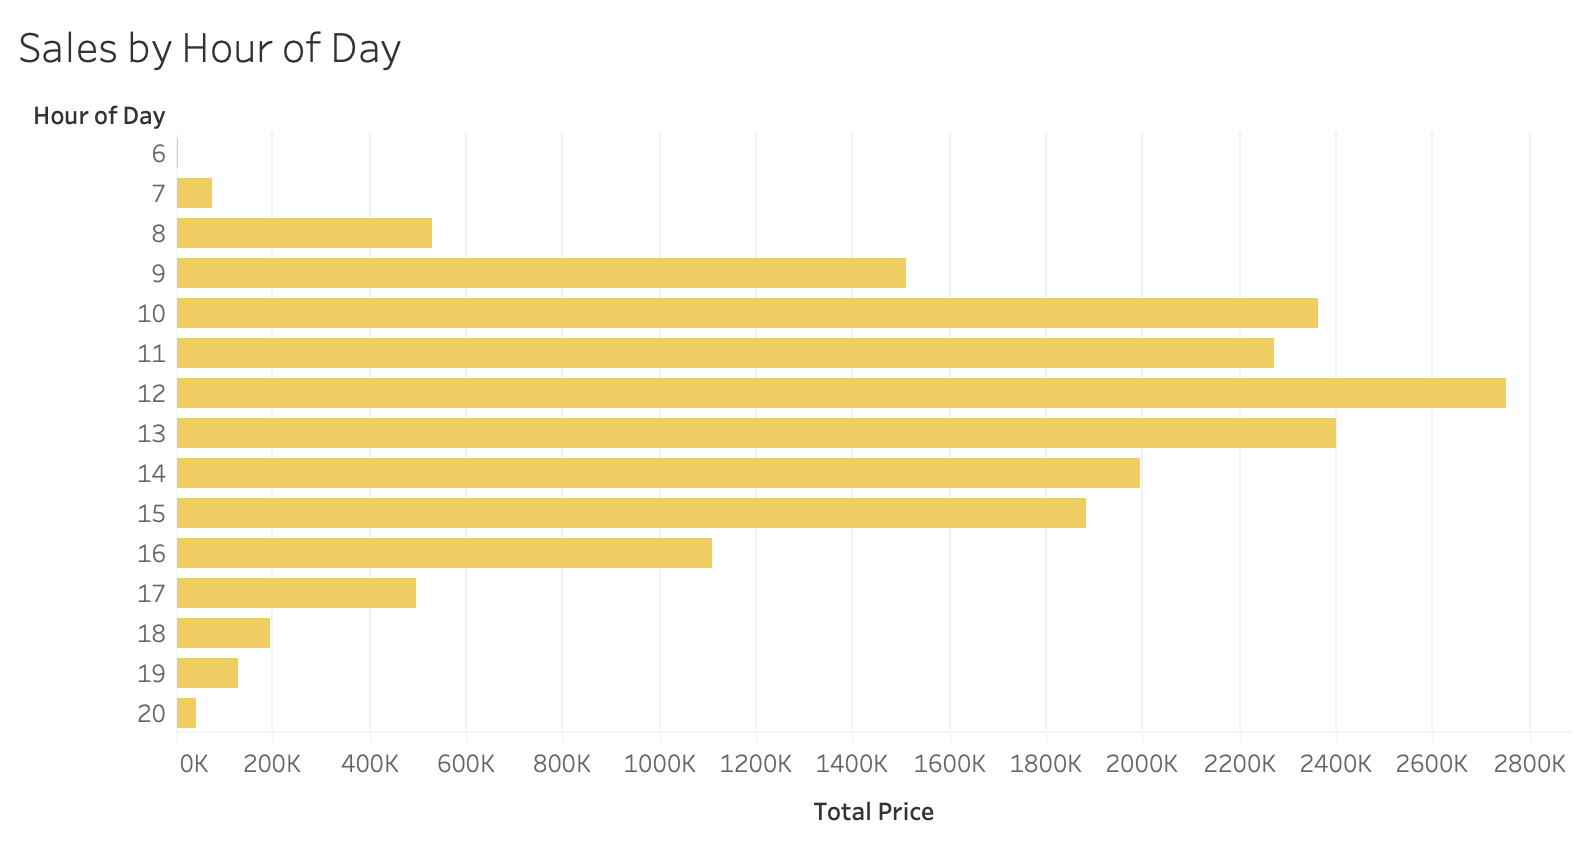

In [63]:
from IPython.display import Image

Image(
    filename='/Users/meryemcamci/Documents/GitHub/retail-sales-project/tableau_screenshots/sales-by-hour-of-day.png',
    width=800  
)

### Sales by Hour of Day


This bar chart shows how revenue changes by hour of the day. Most purchases happen during standard business hours, with a clear increase at 12 PM. Sales begin increasing around 8 AM and descrease crucially after 5 PM. This visualization can support optimize marketing campaigns, customer service availability, and inventory management for rush hours.

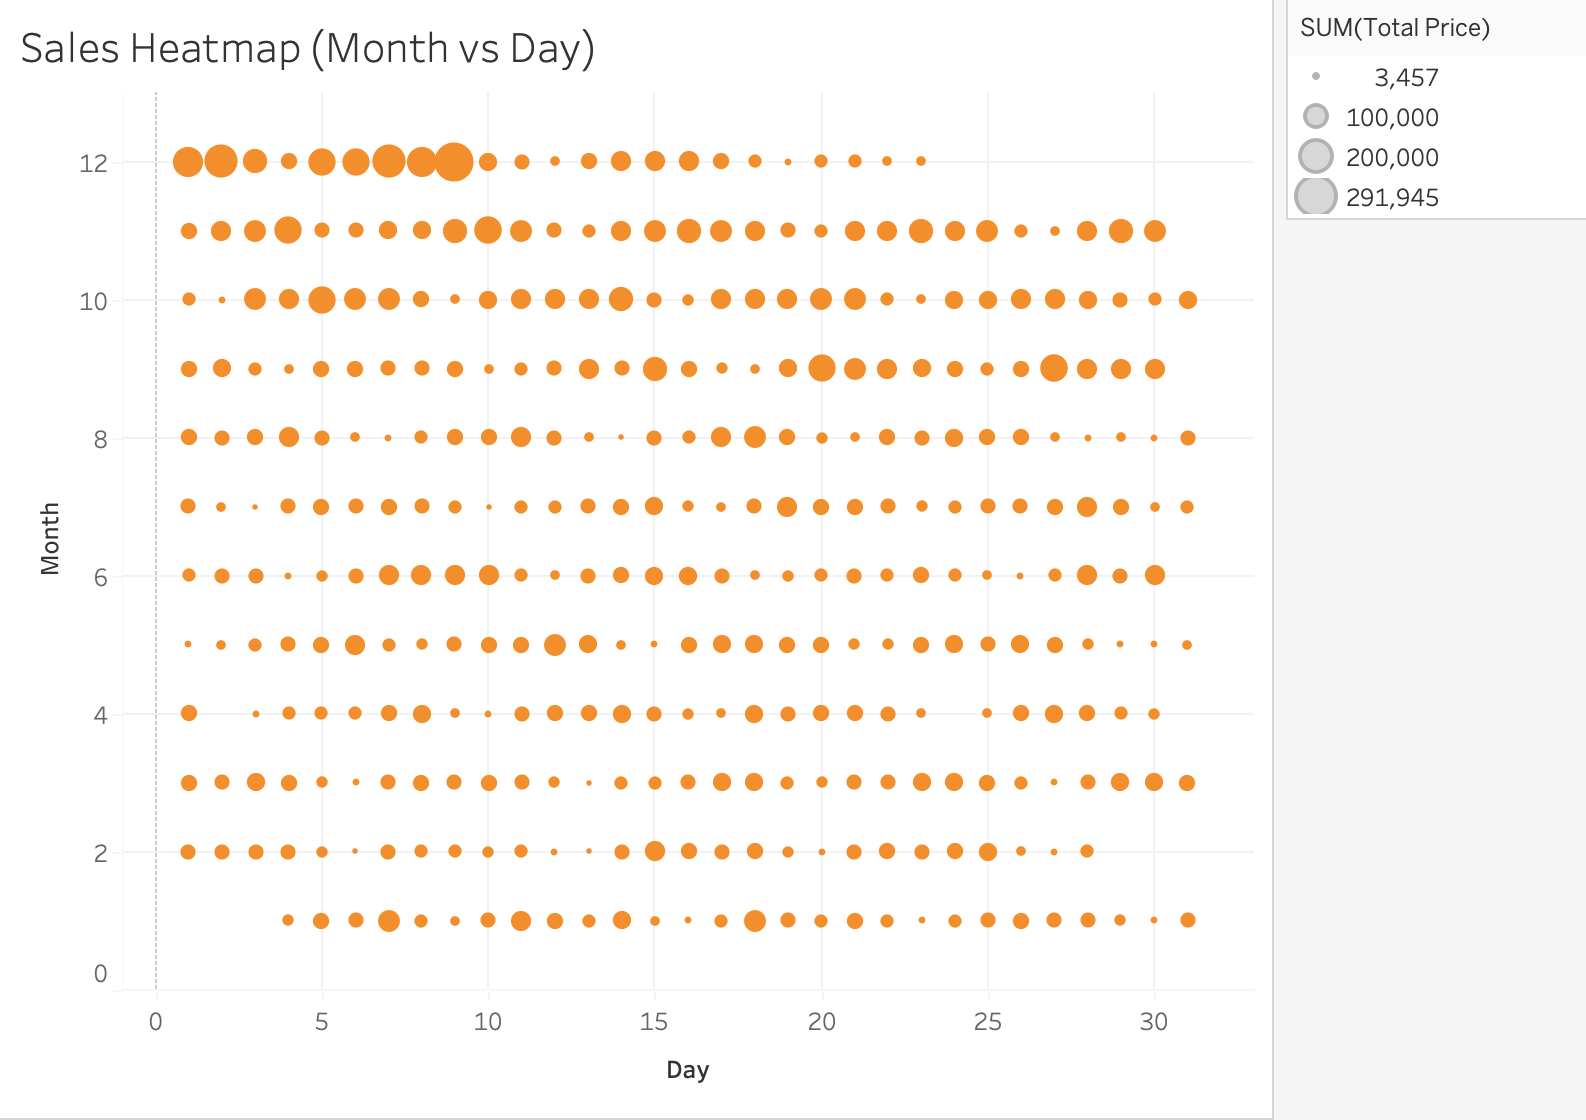

In [65]:
from IPython.display import Image

Image(
    filename='/Users/meryemcamci/Documents/GitHub/retail-sales-project/tableau_screenshots/sales-heatmap-month-vs-day.png',
    width=800  
)

### Sales Heatmap (Month vs Day)
This heatmap chart displays daily revenue activity across months. Each dot represents a day, and also its size reflects the amount of total sales. We can clearly see that december stands out with the highest volume of large dots, showing a holiday-seasonal peak. This confirms the presence of seasonality in sales, especially around year-end.

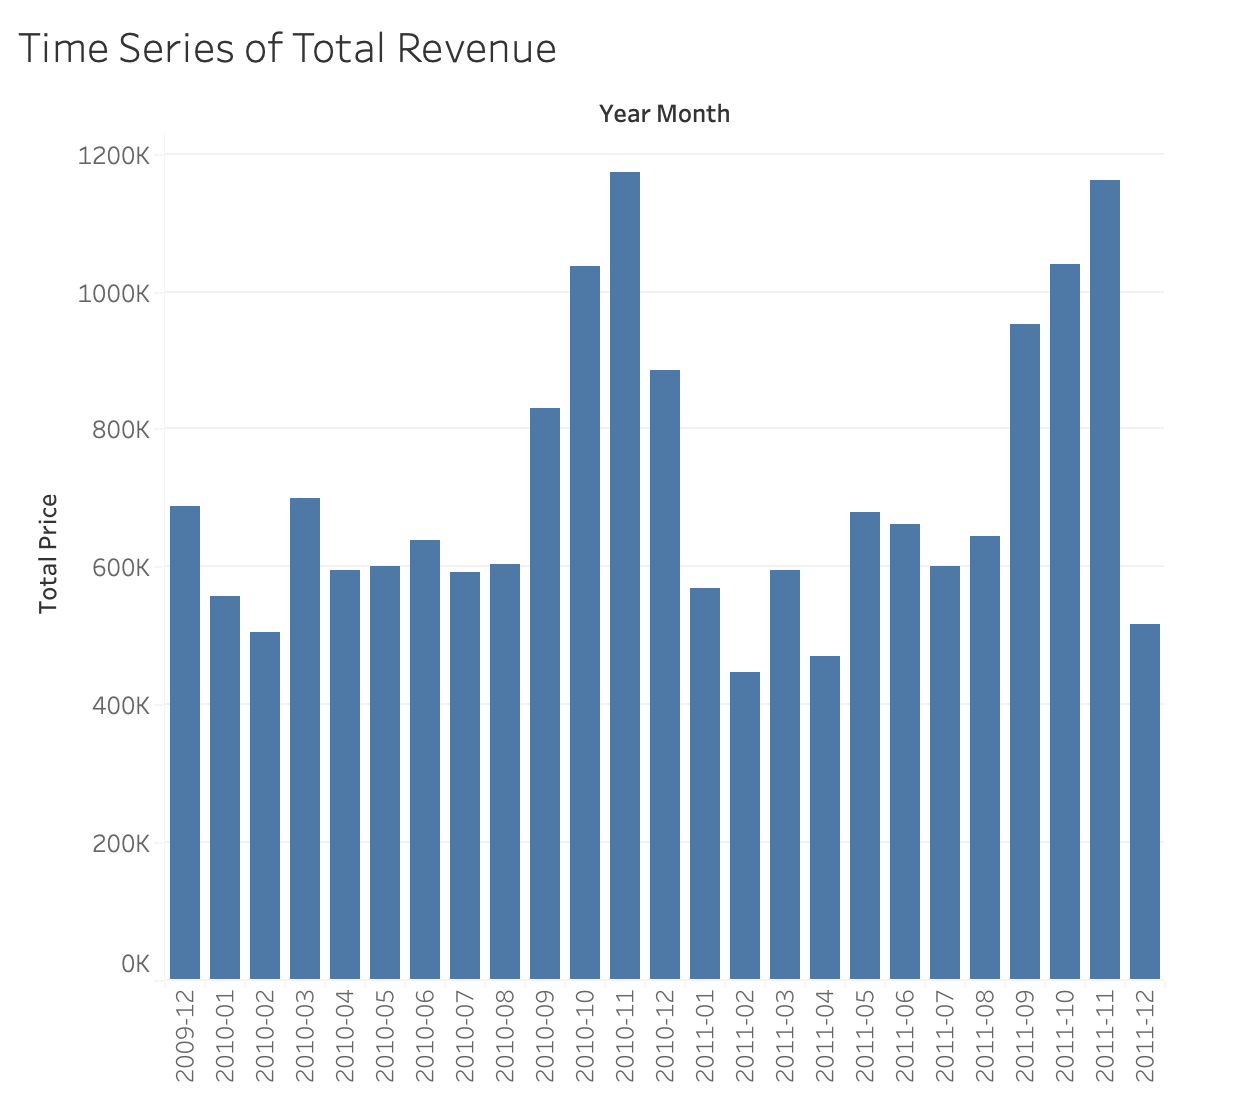

In [67]:
from IPython.display import Image

Image(
    filename='/Users/meryemcamci/Documents/GitHub/retail-sales-project/tableau_screenshots/time-series-of-total-revenue.png',
    width=800  
)

### Time Series of Total Revenue
This time series bar chart shows monthly revenue over several years. A clear seasonal trend is visible, with recurring peaks toward the end of each year. This pattern may indicate holiday shopping behavior. Also, we can see that in the early months of the year, there is post-holiday slowdowns in the chart. 

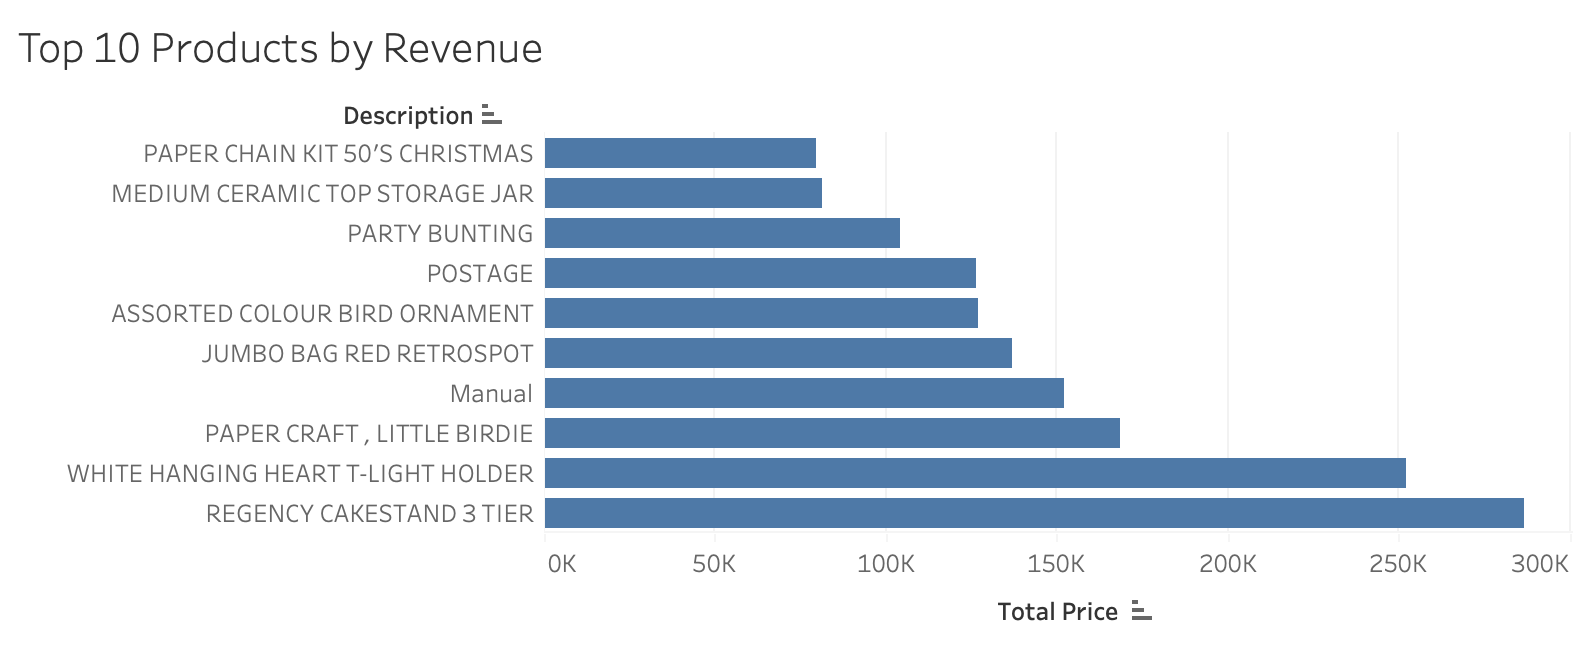

In [69]:
from IPython.display import Image

Image(
    filename='/Users/meryemcamci/Documents/GitHub/retail-sales-project/tableau_screenshots/top-10-products-by-revenue.png',
    width=800  
)

### Top 10 Products by Revenue
This horizontal bar chart illustrates the top 10 revenue-generating products. REGENCY CAKESTAND 3 TIER leads the list, followed by WHITE HANGING HEART T-LIGHT HOLDER. These high performers represent products with strong demand or high prices or both of them which show us the key contributors to the company’s financial success.